# Homework 2
### 20180594 이정훈

## Module Import

In [1]:
#pip install pandas_datareader
import pandas_datareader as wb, pandas as pd, datetime, matplotlib.pyplot as plt, numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Problem 1.
<br>
<span style="font-size:120%">
    Using python, perform the following for the KOSPI index returns during the period 2021:01:02 - 2021:12:30 (on the basis of daily, closing prices).

In [2]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 30)
df_null = wb.DataReader("KOSPI", "naver", start, end)
df = df_null['Close'].dropna().astype('float')

In [3]:
df.head()

Date
2021-01-04    2944.45
2021-01-05    2990.57
2021-01-06    2968.21
2021-01-07    3031.68
2021-01-08    3152.18
Name: Close, dtype: float64

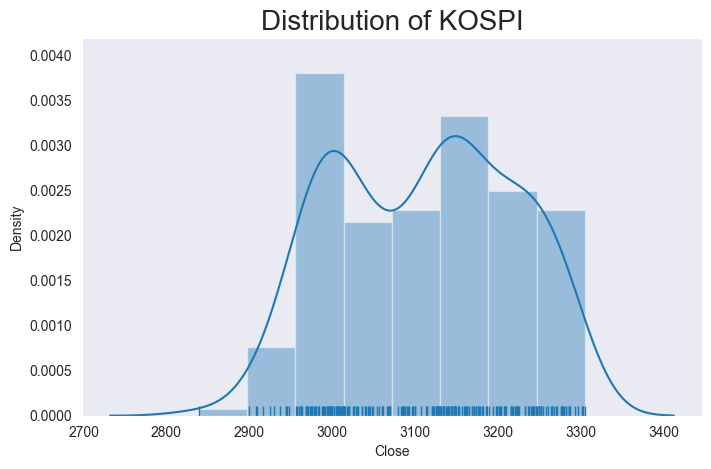

In [4]:
import seaborn as sns
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(df, kde = True, rug = True)
plt.title('Distribution of KOSPI', fontsize = 20)
plt.show()

In [5]:
Idx = pd.DataFrame([np.log(df)], index = ['log_Index']).T.dropna()
Idx.head()

,log_Index
Date,
2021-01-04,7.987677
2021-01-05,8.003219
2021-01-06,7.995714
2021-01-07,8.016872
2021-01-08,8.055850


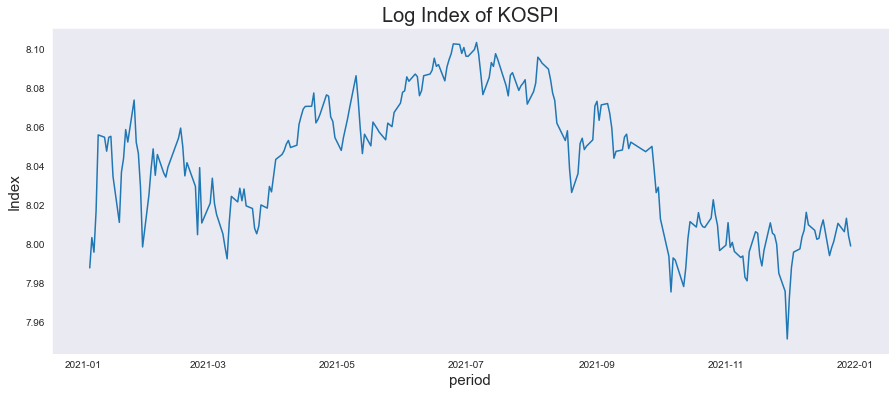

In [6]:
sns.set_style("dark")
plt.figure(figsize = (15,6))
plt.title('Log Index of KOSPI', fontsize = 20)
plt.xlabel('period', fontsize = 15)
plt.ylabel('Index', fontsize = 15)
plt.plot(Idx.log_Index)
plt.show()

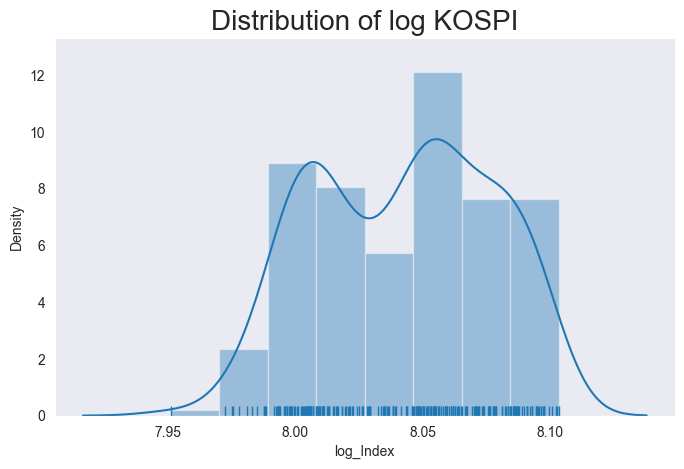

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(Idx.log_Index, kde = True, rug = True)
plt.title('Distribution of log KOSPI', fontsize = 20)
plt.show()

<span style="font-size:110%">
    KOSPI 데이터를 단순히 로그 변환만 해 준 것이므로, 분포에서는 차이가 없다

<b><span style="font-size:130%">
    (a) Find a proper ARMA model for the log KOSPI index. </b>
   <span style="font-size:110%">
<br>
<br>
       ARMA 모델을 찾기 위해서는 우선, AR과 MA의 차수를 각각 구해야 한다.
       
- Partial ACF의 형태를 보고 AR의 차수를 구할 수 있다.
- 차분 데이터의 ACF의 형태를 보고 MA의 차수를 구할 수 있다.

In [8]:
import statsmodels.tsa.stattools as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

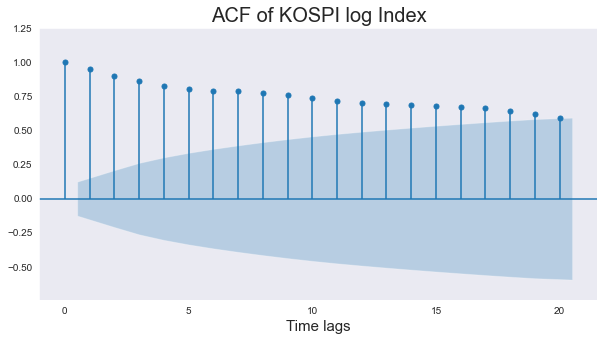

In [9]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(Idx, auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of KOSPI log Index', fontsize = 20)
plt.show()

<Figure size 720x576 with 0 Axes>

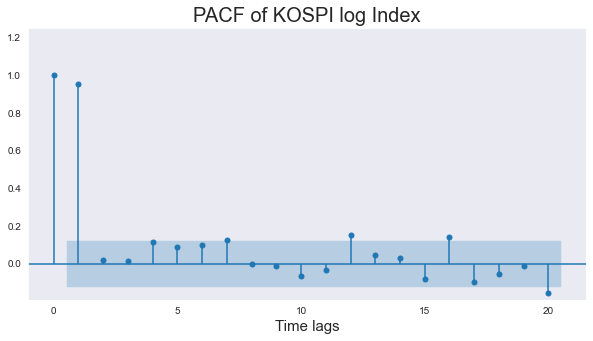

In [10]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(Idx, auto_ylims = True, lags = 20, title = 'PACF of KOSPI log Index', ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of KOSPI log Index', fontsize = 20)
plt.show()

<span style="font-size:110%">
    AR의 차수는 1로 하는것이 적절한 것으로 보인다.

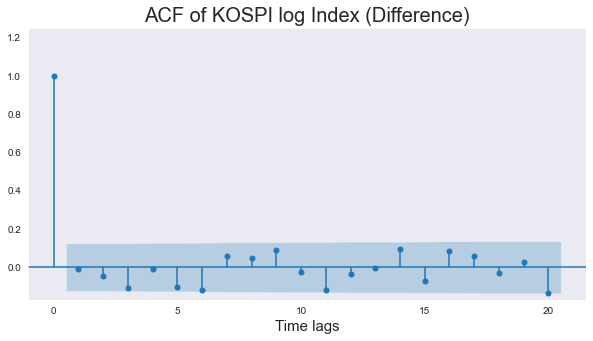

In [11]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(Idx.diff().dropna(), auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('ACF of KOSPI log Index (Difference)', fontsize = 20)
plt.show()

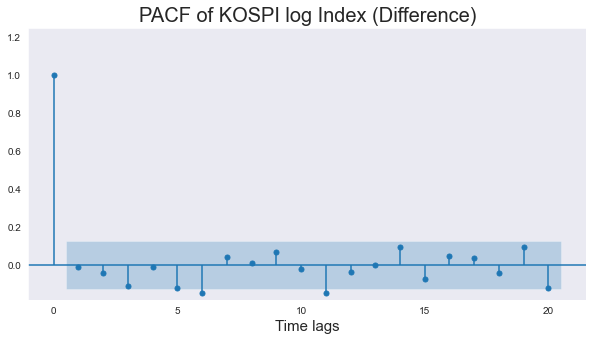

In [12]:
sns.set_style("dark")
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(Idx.diff().dropna(), auto_ylims = True, lags = 20, title = 'ACF of KOSPI log Index' , ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of KOSPI log Index (Difference)', fontsize = 20)
plt.show()

<span style="font-size:110%">
    ACF의 형태를 보아 MA의 차수는 0으로 하는것이 적절한 것으로 보인다.
    
- 최종적으로 ARMA(1,0)모델이 가장 적합하다고 판단하였다.

In [13]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(Idx, order = (1,0,0), trend = 'c').fit(method = 'innovations_mle')
model.summary()

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              log_Index   No. Observations:                  248
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 786.490
Date:                Tue, 11 Oct 2022   AIC                          -1566.980
Time:                        01:12:12   BIC                          -1556.440
Sample:                             0   HQIC                         -1562.737
                                - 248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0343      0.014    563.377      0.000       8.006       8.062
ar.L1          0.9599      0.021     46.490      0.000       0.919       1.000
sigma2         0.0001   7.58e-06     13.462      0.000    8.71e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.35
Prob(Q):                              0.98   Prob(JB):                         0.01
Heteroskedasticity (H):               0.53   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Residual vs. Normal')

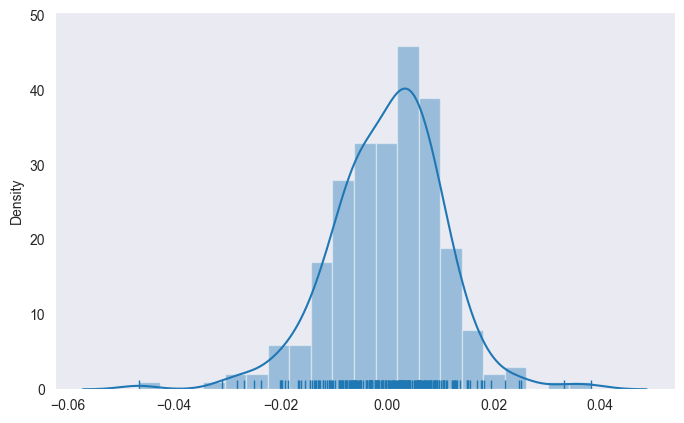

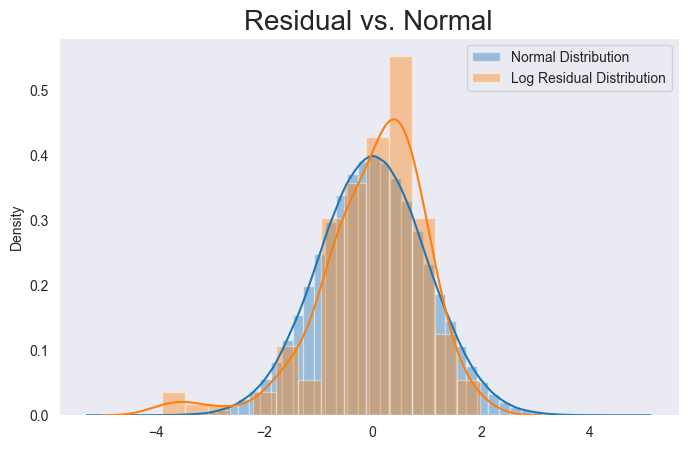

In [14]:
fig, ax1 = plt.subplots(figsize=(8,5), dpi=100)
fig, ax2 = plt.subplots(figsize=(8,5), dpi=100)
sns.distplot(model.resid, kde = True, rug = True , ax = ax1)
plt.title('Residual Plot', fontsize = 20)
sns.distplot(np.random.normal(size=1000000), kde = True, ax = ax2, label = 'Normal Distribution')
sns.distplot(np.log(model.resid) - np.log(model.resid).mean() , 
             kde = True, rug = False , ax = ax2, label = 'Log Residual Distribution')
plt.legend()
plt.title('Residual vs. Normal', fontsize = 20)

AR모델의 잔차를 정규분포와 대조해 보았다.

<b><span style="font-size:130%">
    (b) Test whether the log KOSPI index has a unit root or not using the augmented Dickey-Fuller test </b>
   <span style="font-size:110%">
<br>
       <br>
       statsmodels.tsa.stattools로부터 adfuller함수를 import한다.

In [15]:
from statsmodels.tsa.stattools import adfuller
adfuller(Idx.log_Index, regression = 'c')

(-2.4404828999845987,
 0.13063479169615339,
 0,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 -1499.975850360294)

<span style="font-size:110%">
    Augmented Dickey-Fuller test의 $p$-value가 0.13이 나왔다. 유의수준이 5%라고 가정할 때, $p$-value가 0.05보다 더 크므로 다음과 같은 귀무가설을 기각하지 못한다
    <br>
    <br>
    <center>
        <b>$H_0$</b> : 시계열 자료가 정상 시계열이 아니다 </center>
    <br>
    따라서, 2021년 기간 동안의 log KOSPI data는 안정적인 시계열이 아니다.

## Problem 2.
<br>
<span style="font-size:120%">
    Find a proper SARIMA model for the monthly Korean unemployment rate during the period 2010:01 - 2021:12.

In [16]:
data = pd.read_excel('unemployment.xlsx')

In [17]:
data.head()

,연령계층별,2010.01,2010.01.1,2010.01.2,2010.01.3,2010.01.4,2010.01.5,2010.01.6,2010.01.7,2010.02,...,2021.11.6,2021.11.7,2021.12,2021.12.1,2021.12.2,2021.12.3,2021.12.4,2021.12.5,2021.12.6,2021.12.7
0,연령계층별,인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),인구 (천명),...,실업률 (%),고용률 (%),인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%)
1,15세 이상 전체,40595.0,24258.0,23041.0,1218.0,16336.0,59.8,5.0,56.8,40630.0,...,2.6,61.5,45206.0,28278.0,27298.0,979.0,16929.0,62.6,3.5,60.4
2,15 - 19세,3337.0,306.0,249.0,57.0,3031.0,9.2,18.7,7.5,3342.0,...,6.0,6.7,2275.0,180.0,168.0,13.0,2095.0,7.9,7.0,7.4
3,20 - 29세,6457.0,4117.0,3764.0,353.0,2341.0,63.7,8.6,58.3,6438.0,...,5.5,58.7,6409.0,3976.0,3750.0,226.0,2434.0,62.0,5.7,58.5
4,30 - 39세,8245.0,6094.0,5860.0,234.0,2151.0,73.9,3.8,71.1,8240.0,...,2.8,75.9,6931.0,5436.0,5293.0,143.0,1496.0,78.4,2.6,76.4


<span style="font-size:110%">
    Data는 <b>KOSIS</b>로부터 실업률, 월평균데이터를 적용하여 <b>2010년부터 2021년까지</b>의 데이터를 모두 import하였다.

In [18]:
dates = pd.date_range('2010', periods = 144, freq = 'M')

In [19]:
dates

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [20]:
ur_data = data.values
urate = [ur_data[1,7 + i * 8] for i in range(len(dates))]

Text(0.5, 1.0, 'Unemployment Rate of Korea')

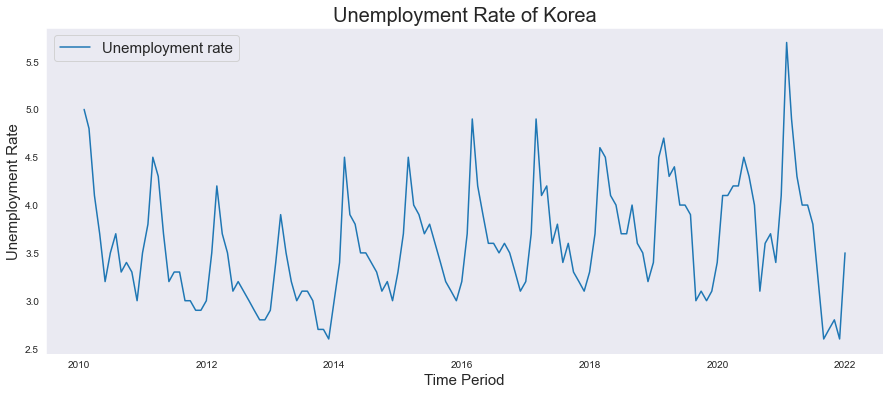

In [21]:
plt.figure(figsize = (15,6))
plt.plot(dates, urate, label = 'Unemployment rate')
plt.legend(fontsize = 15)
plt.xlabel('Time Period', fontsize = 15)
plt.ylabel('Unemployment Rate', fontsize = 15)
plt.title('Unemployment Rate of Korea', fontsize = 20)

<span style="font-size:120%">
    한 눈에 보아도 계절성이 두드러지는것을 알 수 있다.

<Figure size 720x576 with 0 Axes>

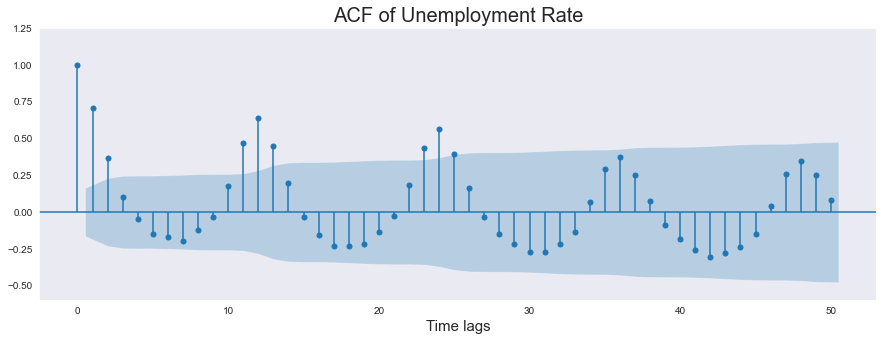

In [22]:
sns.set_style("dark")
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 5))
plot_acf(urate, auto_ylims = True, lags = 50, ax = ax)
plt.title('ACF of Unemployment Rate', fontsize = 20)
plt.xlabel('Time lags', fontsize = 15)
plt.show()

In [23]:
tsa.acf(urate, nlags = 50, qstat = True)[0]

array([ 1.        ,  0.70475219,  0.3699305 ,  0.09880101, -0.04734243,
       -0.1464763 , -0.17303505, -0.20013395, -0.12046762, -0.03637745,
        0.17978221,  0.46923911,  0.6363402 ,  0.45024126,  0.19798722,
       -0.03589334, -0.15786269, -0.23318647, -0.23129994, -0.21529645,
       -0.1375617 , -0.02850192,  0.18160175,  0.43187813,  0.56589286,
        0.39494713,  0.16455105, -0.03109423, -0.1466201 , -0.21472834,
       -0.27114731, -0.27324724, -0.21953393, -0.13437229,  0.06896791,
        0.29021484,  0.37684131,  0.25283177,  0.07361371, -0.09142867,
       -0.1826777 , -0.25831558, -0.30856113, -0.2789133 , -0.23724741,
       -0.1498988 ,  0.04137931,  0.25506138,  0.34369282,  0.25055624,
        0.08415765])

<span style="font-size:120%">
    ACF의 결과, 시차 12개를 중심으로 sin함수의 파동이 있는 것을 관측하였다.

<Figure size 720x576 with 0 Axes>

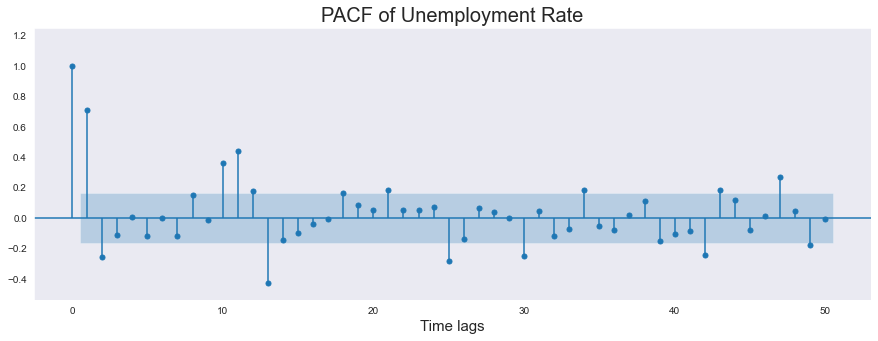

In [24]:
plt.figure(figsize = (10,8))
fig, ax = plt.subplots(figsize=(15, 5))
plot_pacf(urate, auto_ylims = True, lags = 50, ax = ax)
plt.xlabel('Time lags', fontsize = 15)
plt.title('PACF of Unemployment Rate', fontsize = 20)
plt.show()

<span style="font-size:120%">
    PACF 결과, 불안정한 모습을 띄는 것을 관측할 수 있었다.

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarimax_gridsearch(ts, pdq, pdqs, maxiter = 50, freq = 'M'):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, order = comb, seasonal_order = combs, 
                                                enforce_stationarity=False, enforce_invertibility=False)
                output = mod.fit(maxiter = maxiter) 
                ans.append([comb, combs, output.bic])
                print('SARIMAX {} x {}12 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])
    ans_df = ans_df.sort_values(by=['bic'], ascending=True)[0:5]
    
    return ans_df
    
sarimax_gridsearch(urate, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =779.2767613921278
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =580.9598536000357
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =446.93353683523003
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =116.18754790424944
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =99.85693473434551
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =95.06811677136533
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =207.4860884421902
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =141.2201117066407
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =121.70114921546039
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =130.85996017020892
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =109.3109650802694
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =100.21297954567844
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =99.5349230363288
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : BIC Calculated =96.010

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =49.60351565615933
SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : BIC Calculated =53.29830657772342
SARIMAX (0, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =59.07789770034648
SARIMAX (0, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =94.21662684854485
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =71.85539151709435
SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =72.6358640822974
SARIMAX (0, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =52.233963738840764
SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =56.99293776382844


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =56.27508109554162
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =55.860340285057134


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =60.35689522807057
SARIMAX (0, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =64.57427054403959
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =75.01559711752688
SARIMAX (0, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =76.47047901741009
SARIMAX (0, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =77.63487635361867
SARIMAX (0, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =167.5180851654904
SARIMAX (0, 1, 1) x (0, 0, 1, 12)12 : BIC Calculated =120.41914045662392
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12 : BIC Calculated =76.19229735025127
SARIMAX (0, 1, 1) x (0, 1, 0, 12)12 : BIC Calculated =49.290146518143885
SARIMAX (0, 1, 1) x (0, 1, 1, 12)12 : BIC Calculated =44.01375642530516
SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : BIC Calculated =49.900345341818266
SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : BIC Calculated =152.83807220856175
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : BIC Calculated =83.03443505441004
SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : BIC Calculated =63.989

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : BIC Calculated =167.94510403735208
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : BIC Calculated =166.82546886096327
SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : BIC Calculated =167.7493861031217
SARIMAX (0, 2, 1) x (0, 0, 0, 12)12 : BIC Calculated =174.31402368173164
SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : BIC Calculated =119.23051069790891
SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : BIC Calculated =78.71931679755562
SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : BIC Calculated =74.13382219857712
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : BIC Calculated =61.180897561494234
SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : BIC Calculated =65.55188275438096
SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : BIC Calculated =175.21068694049234
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : BIC Calculated =99.15361911599038
SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : BIC Calculated =77.82411752893427
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : BIC Calculated =74.99026930894617
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : BIC Calculated =67.4

SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =48.993455548635964
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =154.53719599395143
SARIMAX (1, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =80.76019779686575
SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =66.35213508194255
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =58.776570257377124
SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =45.85636897524572
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =48.040831178247565
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =37.392600512494724
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =42.817107158800596
SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =49.54624917626638
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =80.71637538630559
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =62.40468880835529
SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =63.84674060059324
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =42.0

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 1, 2, 12)12 : BIC Calculated =52.86628824439438
SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : BIC Calculated =80.01607706681108
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : BIC Calculated =65.05087745918597
SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : BIC Calculated =67.05197145303481
SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : BIC Calculated =45.94924613428634
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : BIC Calculated =49.65369393035466
SARIMAX (1, 1, 0) x (2, 0, 2, 12)12 : BIC Calculated =50.544056267539204
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : BIC Calculated =49.53326373987854
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : BIC Calculated =54.194032790925064
SARIMAX (1, 1, 0) x (2, 1, 2, 12)12 : BIC Calculated =57.52980801755655
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : BIC Calculated =67.1096509329398
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : BIC Calculated =69.6245868442646
SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : BIC Calculated =71.92138421412142
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : BIC Calculated =154.567869

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =50.65471853863038
SARIMAX (1, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =80.25022280034432
SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =64.06730932785425
SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =65.85089090930366
SARIMAX (1, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =43.46550070756614


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =47.935857278322686
SARIMAX (1, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =48.47851073131581
SARIMAX (1, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =46.252857319792696
SARIMAX (1, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =50.80669808270255
SARIMAX (1, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =55.92458101607687
SARIMAX (1, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =66.58221426939019
SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =68.55881529763568
SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =71.45811972767362
SARIMAX (1, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =152.5298694753362
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =109.91770904383019
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =73.67530214498441
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =57.95015162885194
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =46.626719642780664
SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =52.249

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =113.97755818611604
SARIMAX (1, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =232.91249553388315


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =143.84672640796254
SARIMAX (1, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =121.81008462989541
SARIMAX (1, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =130.6284053289105
SARIMAX (1, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =128.4279707713449
SARIMAX (1, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =116.33098706645026
SARIMAX (1, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated =110.76413437685932
SARIMAX (1, 2, 0) x (1, 1, 1, 12)12 : BIC Calculated =114.72889542766154
SARIMAX (1, 2, 0) x (1, 1, 2, 12)12 : BIC Calculated =114.23692774029988
SARIMAX (1, 2, 0) x (1, 2, 0, 12)12 : BIC Calculated =139.31579161646619
SARIMAX (1, 2, 0) x (1, 2, 1, 12)12 : BIC Calculated =126.06630507180691
SARIMAX (1, 2, 0) x (1, 2, 2, 12)12 : BIC Calculated =121.47554830072042
SARIMAX (1, 2, 0) x (2, 0, 0, 12)12 : BIC Calculated =113.61136759411016
SARIMAX (1, 2, 0) x (2, 0, 1, 12)12 : BIC Calculated =117.08681080392265
SARIMAX (1, 2, 0) x (2, 0, 2, 12)12 : BIC Calculated 

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =65.4987954639507
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =75.65300879435522
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =78.64829767135896


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =78.8421360310918
SARIMAX (2, 0, 0) x (0, 0, 0, 12)12 : BIC Calculated =174.30986177520546
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : BIC Calculated =125.5825103656922
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : BIC Calculated =81.30305892623244
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : BIC Calculated =47.72288129944727
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : BIC Calculated =37.102876682385414
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : BIC Calculated =44.550474101503795
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : BIC Calculated =154.8602300936869
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : BIC Calculated =78.14923158933883
SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : BIC Calculated =64.358986791304
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : BIC Calculated =51.73022744183149
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : BIC Calculated =42.58496344799431
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : BIC Calculated =44.50439546827719
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : BIC Calculated =32.8445072

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 1, 12)12 : BIC Calculated =48.896637337650645


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 12)12 : BIC Calculated =50.336280306526874
SARIMAX (2, 0, 1) x (1, 1, 0, 12)12 : BIC Calculated =37.57282558206928
SARIMAX (2, 0, 1) x (1, 1, 1, 12)12 : BIC Calculated =42.09022810569882
SARIMAX (2, 0, 1) x (1, 1, 2, 12)12 : BIC Calculated =49.336772135159855
SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : BIC Calculated =77.81935219278719
SARIMAX (2, 0, 1) x (1, 2, 1, 12)12 : BIC Calculated =62.553011925133276
SARIMAX (2, 0, 1) x (1, 2, 2, 12)12 : BIC Calculated =63.87850231344601
SARIMAX (2, 0, 1) x (2, 0, 0, 12)12 : BIC Calculated =42.09936141682212


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : BIC Calculated =46.516412116615804


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : BIC Calculated =49.46274892778679
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : BIC Calculated =45.32994109159422
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : BIC Calculated =49.974829897936814
SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : BIC Calculated =54.29339700476227
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : BIC Calculated =65.38898436772435
SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : BIC Calculated =66.19841677019473
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : BIC Calculated =68.88173053970307
SARIMAX (2, 0, 2) x (0, 0, 0, 12)12 : BIC Calculated =155.61665825068556
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : BIC Calculated =114.74875094950556


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : BIC Calculated =82.76810124106227
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : BIC Calculated =54.290139738384795
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : BIC Calculated =47.099093849949604
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : BIC Calculated =52.96724841843541


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : BIC Calculated =159.32899087079988
SARIMAX (2, 0, 2) x (0, 2, 1, 12)12 : BIC Calculated =85.64710961330648
SARIMAX (2, 0, 2) x (0, 2, 2, 12)12 : BIC Calculated =72.00632919816825
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : BIC Calculated =58.468269235977026
SARIMAX (2, 0, 2) x (1, 0, 1, 12)12 : BIC Calculated =50.57103082262053
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : BIC Calculated =52.43104737101635
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : BIC Calculated =41.67220134258142
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : BIC Calculated =46.81108075256101
SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : BIC Calculated =53.08233805303982


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : BIC Calculated =82.44629526640423
SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : BIC Calculated =66.42883549222057


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : BIC Calculated =67.32428050814205
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : BIC Calculated =46.33948202310154
SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : BIC Calculated =50.98173972356179


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : BIC Calculated =54.538864230963725
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : BIC Calculated =49.989374017569816


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : BIC Calculated =54.52901904545908
SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : BIC Calculated =57.98786857622469
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : BIC Calculated =69.95003619270128
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : BIC Calculated =71.21741650859161


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : BIC Calculated =71.63188372666846
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : BIC Calculated =171.52488611106762
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : BIC Calculated =121.52871491307441
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : BIC Calculated =78.21884178388926
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : BIC Calculated =55.52623811121312
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : BIC Calculated =51.22889597552863
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : BIC Calculated =56.00256410989634
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : BIC Calculated =159.1419393619361
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : BIC Calculated =88.78332856596926
SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : BIC Calculated =70.68178778943272
SARIMAX (2, 1, 0) x (1, 0, 0, 12)12 : BIC Calculated =54.289301172801046
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : BIC Calculated =51.027607532270586
SARIMAX (2, 1, 0) x (1, 0, 2, 12)12 : BIC Calculated =54.037135112306245
SARIMAX (2, 1, 0) x (1, 1, 0, 12)12 : BIC Calculated =46.67

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 12)12 : BIC Calculated =50.31506577181679
SARIMAX (2, 1, 1) x (1, 1, 0, 12)12 : BIC Calculated =41.864812698845796
SARIMAX (2, 1, 1) x (1, 1, 1, 12)12 : BIC Calculated =46.46462498918053
SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : BIC Calculated =52.51660888353291
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : BIC Calculated =79.14602995916229
SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : BIC Calculated =66.86442858604343
SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : BIC Calculated =67.48155492573319
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : BIC Calculated =46.42316623497551


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : BIC Calculated =52.54355142449416


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : BIC Calculated =53.26387720321158
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : BIC Calculated =51.25502743953632
SARIMAX (2, 1, 1) x (2, 1, 1, 12)12 : BIC Calculated =55.79161082195982


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 12)12 : BIC Calculated =58.131334718969654
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : BIC Calculated =70.60545876779221
SARIMAX (2, 1, 1) x (2, 2, 1, 12)12 : BIC Calculated =72.9050160060869
SARIMAX (2, 1, 1) x (2, 2, 2, 12)12 : BIC Calculated =75.37863613670555
SARIMAX (2, 1, 2) x (0, 0, 0, 12)12 : BIC Calculated =146.72337871902204
SARIMAX (2, 1, 2) x (0, 0, 1, 12)12 : BIC Calculated =112.55159508408542
SARIMAX (2, 1, 2) x (0, 0, 2, 12)12 : BIC Calculated =76.1706433782508
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : BIC Calculated =62.57748357517882
SARIMAX (2, 1, 2) x (0, 1, 1, 12)12 : BIC Calculated =49.87723100016887
SARIMAX (2, 1, 2) x (0, 1, 2, 12)12 : BIC Calculated =56.761126495237555
SARIMAX (2, 1, 2) x (0, 2, 0, 12)12 : BIC Calculated =163.00054917004147
SARIMAX (2, 1, 2) x (0, 2, 1, 12)12 : BIC Calculated =94.54116119036489
SARIMAX (2, 1, 2) x (0, 2, 2, 12)12 : BIC Calculated =72.6798971937632
SARIMAX (2, 1, 2) x (1, 0, 0, 12)12 : BIC Calculated =59.38192

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 12)12 : BIC Calculated =79.59526530833855
SARIMAX (2, 2, 0) x (0, 0, 0, 12)12 : BIC Calculated =225.35973400802666
SARIMAX (2, 2, 0) x (0, 0, 1, 12)12 : BIC Calculated =171.9183600468853
SARIMAX (2, 2, 0) x (0, 0, 2, 12)12 : BIC Calculated =123.72597585756853
SARIMAX (2, 2, 0) x (0, 1, 0, 12)12 : BIC Calculated =112.98000636259262
SARIMAX (2, 2, 0) x (0, 1, 1, 12)12 : BIC Calculated =103.75810021801271
SARIMAX (2, 2, 0) x (0, 1, 2, 12)12 : BIC Calculated =104.54685000195391
SARIMAX (2, 2, 0) x (0, 2, 0, 12)12 : BIC Calculated =208.75361833247237
SARIMAX (2, 2, 0) x (0, 2, 1, 12)12 : BIC Calculated =130.38926122293017
SARIMAX (2, 2, 0) x (0, 2, 2, 12)12 : BIC Calculated =113.86309925863823
SARIMAX (2, 2, 0) x (1, 0, 0, 12)12 : BIC Calculated =110.05084719814418
SARIMAX (2, 2, 0) x (1, 0, 1, 12)12 : BIC Calculated =109.24611571883692
SARIMAX (2, 2, 0) x (1, 0, 2, 12)12 : BIC Calculated =105.14053809782182
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : BIC Calculated 

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : BIC Calculated =56.521954687684584
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : BIC Calculated =61.27541168505608
SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : BIC Calculated =63.87621125945705
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : BIC Calculated =96.22151273163655
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : BIC Calculated =81.4609759329223
SARIMAX (2, 2, 1) x (1, 2, 2, 12)12 : BIC Calculated =78.5574622181679
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : BIC Calculated =60.356257244015254
SARIMAX (2, 2, 1) x (2, 0, 1, 12)12 : BIC Calculated =64.05570528216943
SARIMAX (2, 2, 1) x (2, 0, 2, 12)12 : BIC Calculated =64.54452470530883
SARIMAX (2, 2, 1) x (2, 1, 0, 12)12 : BIC Calculated =63.252074711083324
SARIMAX (2, 2, 1) x (2, 1, 1, 12)12 : BIC Calculated =67.43868953759959
SARIMAX (2, 2, 1) x (2, 1, 2, 12)12 : BIC Calculated =69.86276733294832
SARIMAX (2, 2, 1) x (2, 2, 0, 12)12 : BIC Calculated =78.90111753098269
SARIMAX (2, 2, 1) x (2, 2, 1, 12)12 : BIC Calculated =82.508498

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : BIC Calculated =62.76325193103618
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : BIC Calculated =167.6242440417039
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : BIC Calculated =100.9222644407362
SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : BIC Calculated =79.19055223011276
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : BIC Calculated =69.40619136027206
SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : BIC Calculated =65.0255198553087
SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : BIC Calculated =68.9661849358239
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : BIC Calculated =55.87316157262424
SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : BIC Calculated =60.23778622327474


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : BIC Calculated =62.400972768505326
SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : BIC Calculated =100.93557115522894
SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : BIC Calculated =78.62014061864073


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : BIC Calculated =77.50845562063833
SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : BIC Calculated =60.0908982867371


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : BIC Calculated =63.62115027793098


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 12)12 : BIC Calculated =65.60979790420018
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : BIC Calculated =62.91423368946316


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : BIC Calculated =66.03903393226864


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : BIC Calculated =69.59230400731106
SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : BIC Calculated =79.27223033935635
SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : BIC Calculated =82.39654090955285


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : BIC Calculated =83.98763383380933


,pdq,pdqs,bic
255,"(1, 0, 0)","(1, 1, 0, 12)",30.349143
282,"(1, 0, 1)","(1, 1, 0, 12)",32.635240
498,"(2, 0, 0)","(1, 1, 0, 12)",32.844507
247,"(1, 0, 0)","(0, 1, 1, 12)",34.656176
261,"(1, 0, 0)","(2, 0, 0, 12)",34.943229


<span style="font-size:120%">
    BIC 기준으로 GridSearch를 진행한 결과, SARIMA$(1,0,0)(1,1,0)_{12}$모델이 가장 적합한 것으로 나왔다.

In [27]:
model = SARIMAX(urate, order = (1, 0, 0), 
                seasonal_order = (1, 1, 0, 12), enforce_stationarity = False, 
                enforce_invertibility = False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                  -8.006
Date:                            Tue, 11 Oct 2022   AIC                             22.012
Time:                                    01:19:14   BIC                             30.349
Sample:                                         0   HQIC                            25.397
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6496      0.059     11.082      0.000       0.535       0.764
ar.S.L12      -0.4291      0.088     -4.873      0.000      -0.602      -0.256
sigma2         0.0670      0.006     11.425      0.000       0.055       0.078
===================================================================================
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                45.85
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               5.01   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<span style="font-size:120%">
    BIC기준 가장 좋은 모델을 실행한 결과, 위와 같은 결과가 나왔다.

In [28]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def sarimax_gridsearch(ts, pdq, pdqs, maxiter = 50, freq = 'M'):
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, order = comb, seasonal_order = combs, 
                                                enforce_stationarity=False, enforce_invertibility=False)
                output = mod.fit(maxiter = maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue
            
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df
    
sarimax_gridsearch(urate, pdq, pdqs, freq='M')

SARIMAX (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =776.3139167618679
SARIMAX (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =575.2094589536333
SARIMAX (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =438.59616635589543
SARIMAX (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =113.31235058104829
SARIMAX (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =94.29868774812246
SARIMAX (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =87.04963026797961
SARIMAX (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =204.70696494907867
SARIMAX (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =135.87445403771687
SARIMAX (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =114.03951854065878
SARIMAX (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =125.09435632503617
SARIMAX (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =100.68537311066595
SARIMAX (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =89.09648557323231
SARIMAX (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =93.95993955076472
SARIMAX (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =87.

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =44.04526866993627
SARIMAX (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =44.986252704326425
SARIMAX (0, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =48.42414132389822
SARIMAX (0, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =88.87096917962104
SARIMAX (0, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =63.86507423475815
SARIMAX (0, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =62.46268495321739
SARIMAX (0, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =43.896593259506176
SARIMAX (0, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =45.87644379138232


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =42.4216579732133
SARIMAX (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =47.84185378167142


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =49.66557989022295
SARIMAX (0, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =51.25707507347925
SARIMAX (0, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =67.35396644272527
SARIMAX (0, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =66.25497145100792
SARIMAX (0, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =64.91840244226864
SARIMAX (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =161.62056538473405
SARIMAX (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =111.8397032435389
SARIMAX (0, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =65.14360161106025
SARIMAX (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =43.57052170942054
SARIMAX (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =35.727234620911894
SARIMAX (0, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =39.28450394118818
SARIMAX (0, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =147.31372433896624
SARIMAX (0, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =75.07255400393747
SARIMAX (0, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =53.8589

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =160.31521969054208
SARIMAX (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =156.65228973188326
SARIMAX (0, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =155.0863886373554
SARIMAX (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =168.43073883651303
SARIMAX (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =110.67441990615006
SARIMAX (0, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =67.70495603313016
SARIMAX (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =68.42976167073789
SARIMAX (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =52.92012698817514
SARIMAX (0, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =54.97431915781546
SARIMAX (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =169.7035065582796
SARIMAX (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =91.22044641856627
SARIMAX (0, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =67.73696322073809
SARIMAX (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =66.38766595757943
SARIMAX (0, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =56.091

SARIMAX (1, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =33.069693447690824
SARIMAX (1, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =143.4885002547604
SARIMAX (1, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =67.49039604607813
SARIMAX (1, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =51.15653812302301
SARIMAX (1, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =44.40058364137137
SARIMAX (1, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =28.697494549075692
SARIMAX (1, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =28.705613634663273
SARIMAX (1, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =23.49698304693708
SARIMAX (1, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =26.244063550014054
SARIMAX (1, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =30.96852672516372
SARIMAX (1, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =67.35223121399605
SARIMAX (1, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =46.48092670741015
SARIMAX (1, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =46.11854414852045
SARIMAX (1, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =25.365

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =39.54909277383405
SARIMAX (1, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =72.02575978447487
SARIMAX (1, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =54.3971210827377
SARIMAX (1, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =54.33549754168479
SARIMAX (1, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =34.86650763642368
SARIMAX (1, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =35.80027080802634
SARIMAX (1, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =33.919948520745216
SARIMAX (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =38.87950736343028
SARIMAX (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =40.87683732036473
SARIMAX (1, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =41.54917345288415
SARIMAX (1, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =56.93647180385979
SARIMAX (1, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =56.908112932914584
SARIMAX (1, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =56.6616155205014
SARIMAX (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =145.721589

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =34.730956437685236
SARIMAX (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =69.59646642389605
SARIMAX (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =50.797507577066625
SARIMAX (1, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =50.65529395038412
SARIMAX (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =29.612077585237817


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =31.311749531528697
SARIMAX (1, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =29.143293187731516
SARIMAX (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =32.93566184923236
SARIMAX (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =34.82606351803015
SARIMAX (1, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =37.34685856497421
SARIMAX (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =53.86574035804018
SARIMAX (1, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =53.29904660401565
SARIMAX (1, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =53.72992327560082
SARIMAX (1, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =140.76329978489898
SARIMAX (1, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =95.6575577242321
SARIMAX (1, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =57.15376099834623
SARIMAX (1, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =46.54203057317347
SARIMAX (1, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =32.85876868724884
SARIMAX (1, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =36.38322

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =129.07419162313968
SARIMAX (1, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =107.37164831299603
SARIMAX (1, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =103.36171678548595
SARIMAX (1, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =227.38814766428763


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =135.88484535748998
SARIMAX (1, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =111.67968665728239
SARIMAX (1, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =122.04896811582547
SARIMAX (1, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =116.9887211538982
SARIMAX (1, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =102.52011739246147
SARIMAX (1, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =102.47761257246604
SARIMAX (1, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =103.68019968847051
SARIMAX (1, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =100.96712598951227
SARIMAX (1, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =131.3539105659936
SARIMAX (1, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =115.45046367117682
SARIMAX (1, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =108.81255083495414
SARIMAX (1, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =102.56267185491913
SARIMAX (1, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =103.27594112993387
SARIMAX (1, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated 

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =44.42096355811361
SARIMAX (1, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =60.45741183543568
SARIMAX (1, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =60.92010121928617


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (1, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =58.755259978957
SARIMAX (2, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =165.44238060240167
SARIMAX (2, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =114.08172107288759
SARIMAX (2, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =67.40744146067479
SARIMAX (2, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =39.12027794808053
SARIMAX (2, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =25.9863827099393
SARIMAX (2, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =31.18632992919427
SARIMAX (2, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =146.54817622028992
SARIMAX (2, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =67.45791625149121
SARIMAX (2, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =51.58960233330129
SARIMAX (2, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =40.260089640009156
SARIMAX (2, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =28.247291195716397
SARIMAX (2, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =27.829654509608012
SARIMAX (2, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =21.7617

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =31.69143063491715


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =30.941487935267222
SARIMAX (2, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =23.719402459740955
SARIMAX (2, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =25.46612035890483
SARIMAX (2, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =30.692698476375384
SARIMAX (2, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =64.50215672222686
SARIMAX (2, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =46.57237736046088
SARIMAX (2, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =46.075438837555986
SARIMAX (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =25.47525367002813


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =27.12161974535615


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =27.29727193206147
SARIMAX (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =29.349306526921822
SARIMAX (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =31.330756239152347
SARIMAX (2, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =32.98588425186573
SARIMAX (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =50.12921567410432
SARIMAX (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =48.3953532943047
SARIMAX (2, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =48.53537228154304
SARIMAX (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =140.8728587987947
SARIMAX (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =97.58987652333553


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =63.432883697477976
SARIMAX (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =39.99107771657644
SARIMAX (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =30.526050241163066
SARIMAX (2, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =34.38952596733275


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =145.5181211968111
SARIMAX (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =69.72334751236134
SARIMAX (2, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =54.27813274609545
SARIMAX (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =41.263062533243534
SARIMAX (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =30.552343992088822
SARIMAX (2, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =30.333655892634294
SARIMAX (2, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =25.048093595787428
SARIMAX (2, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =27.475863208976723
SARIMAX (2, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =31.85065525177963


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =66.46566070173182
SARIMAX (2, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =47.85111304111791


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =47.063484562916
SARIMAX (2, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =26.944689651841887
SARIMAX (2, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =28.816262727836467


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =29.679298817783916
SARIMAX (2, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =31.345300358785344


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =33.221506292562545
SARIMAX (2, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =34.10222542480698
SARIMAX (2, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =52.14697271681125
SARIMAX (2, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =50.87105825043159


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =48.838488288289156
SARIMAX (2, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =162.6786064399331
SARIMAX (2, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =110.05857711125208
SARIMAX (2, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =64.36541866156094
SARIMAX (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =46.9468008981281
SARIMAX (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =40.14615747766597
SARIMAX (2, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =42.685368639336005
SARIMAX (2, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =150.85541755754284
SARIMAX (2, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =78.12957218952099
SARIMAX (2, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =57.9653138780827
SARIMAX (2, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =42.85005155535436
SARIMAX (2, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =36.728545510462226
SARIMAX (2, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =37.41302736551225
SARIMAX (2, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =35.6260

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =30.9798482282325
SARIMAX (2, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =28.053943024857016
SARIMAX (2, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =29.89158138039399
SARIMAX (2, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =33.93888643243025
SARIMAX (2, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =65.87622820837467
SARIMAX (2, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =50.9406664850983
SARIMAX (2, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =49.7533584736604
SARIMAX (2, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =29.85012262618897


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =33.20833388090987


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =31.166485724829524
SARIMAX (2, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =35.33126533859118
SARIMAX (2, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =37.21388837085716


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =36.89965191770948
SARIMAX (2, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =55.40986180887267
SARIMAX (2, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =55.17681955401411
SARIMAX (2, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =55.1178401914795
SARIMAX (2, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =132.0151666059755
SARIMAX (2, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =95.43941350056772
SARIMAX (2, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =56.89551204050625
SARIMAX (2, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =48.31733225558074
SARIMAX (2, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =33.355689853530684
SARIMAX (2, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =38.250390201247946
SARIMAX (2, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =149.23259821450964
SARIMAX (2, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =78.67481579551665
SARIMAX (2, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =55.027377154419916
SARIMAX (2, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =42.2230

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =56.8991681148972
SARIMAX (2, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =216.53480674019875
SARIMAX (2, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =160.47911042943863
SARIMAX (2, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =109.91510618357974
SARIMAX (2, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =104.42391557083377
SARIMAX (2, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =92.70940447882168
SARIMAX (2, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =91.2770482511663
SARIMAX (2, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =200.49284775915328
SARIMAX (2, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =119.77341982230007
SARIMAX (2, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =101.20010179287195
SARIMAX (2, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =98.64272614246572
SARIMAX (2, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =94.98596439923884
SARIMAX (2, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =88.56749448903528
SARIMAX (2, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =88.72

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =42.75400373215276
SARIMAX (2, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =44.75387053841789
SARIMAX (2, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =45.36547496546744
SARIMAX (2, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =82.99955823592968
SARIMAX (2, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =65.59463053807406
SARIMAX (2, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =60.90494217882462
SARIMAX (2, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =43.83471609737707
SARIMAX (2, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =44.78057394442487
SARIMAX (2, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =42.51580317645792
SARIMAX (2, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =47.385729316235086
SARIMAX (2, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =48.92795324360998
SARIMAX (2, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =48.70764013981735
SARIMAX (2, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =63.770386068688445
SARIMAX (2, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =64.85597

/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =44.32014901342873
SARIMAX (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =153.89958339988763
SARIMAX (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =85.11389051135838
SARIMAX (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =61.614535684494804
SARIMAX (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =52.29400977675436
SARIMAX (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =45.11621025009856
SARIMAX (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =47.0067279089179
SARIMAX (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =39.351620425986056
SARIMAX (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =41.02326132473199


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =41.32314086266824
SARIMAX (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =85.0692257603807
SARIMAX (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =60.177037701033285


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =57.421579568503525
SARIMAX (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =40.81576694899255


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =41.59242874908007


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =40.905408748930924
SARIMAX (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =44.40349739547355


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =44.88390673913766


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =45.87974311324433
SARIMAX (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =61.619710300013075
SARIMAX (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =62.22223229316053


/Users/tommylee/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX (2, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =61.38989827515768


,pdq,pdqs,aic
282,"(1, 0, 1)","(1, 1, 0, 12)",21.518746
498,"(2, 0, 0)","(1, 1, 0, 12)",21.761769
255,"(1, 0, 0)","(1, 1, 0, 12)",22.011772
288,"(1, 0, 1)","(2, 0, 0, 12)",23.390747
499,"(2, 0, 0)","(1, 1, 1, 12)",23.490814


<span style="font-size:120%">
    추가적으로 AIC 기준으로 GridSearch를 진행한 결과, SARIMA$(1,0,1)(1,1,0)_{12}$모델이 가장 적합한 것으로 나왔다.

In [29]:
model = SARIMAX(urate, order = (1, 0, 1), 
                seasonal_order = (1, 1, 0, 12), enforce_stationarity = False, 
                enforce_invertibility = False).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood                  -6.759
Date:                             Tue, 11 Oct 2022   AIC                             21.519
Time:                                     01:26:14   BIC                             32.635
Sample:                                          0   HQIC                            26.033
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7666      0.082      9.327      0.000       0.606       0.928
ma.L1         -0.2147      0.127     -1.697      0.090      -0.463       0.033
ar.S.L12      -0.4292      0.083     -5.197      0.000      -0.591      -0.267
sigma2         0.0656      0.006     11.763      0.000       0.055       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                57.52
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               5.63   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<span style="font-size:120%">
    AIC와 BIC기준 최적 모델은 차이가 있으나, 패널티항의 규제가 더 강한 BIC의 기준으로 보자면 한국 실업률에 대한 가장 적합한 모형은 SARIMA$(1,0,0)(1,1,0)_{12}$이라고 할 수 있다.